<a href="https://colab.research.google.com/github/AlexanderOnbysh/edu/blob/master/masters/machine-learning/Practice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization in Machine Learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #4

This colaboratory also contains Homework #4 of the Machine Learning course, which is due **April 16, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

In [0]:
import pandas as pd
import numpy as np

import os

import warnings
warnings.filterwarnings('ignore') #does not really work anyway :)


# Regularisation 

## Simple linear regression vs ridge regression and lasso regression. 

Toy 2D example returns to help us with regularisation

In [0]:
# Note that distance and fare_amount were substituted with `x` and `y` for simplification
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [0]:
# Cannot live without plotnine :)
!pip install plotnine
from plotnine import *

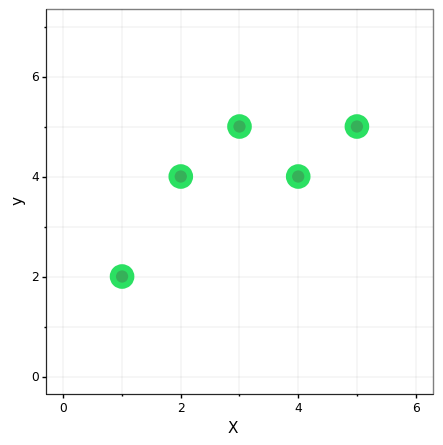

<ggplot: (8732701067191)>

In [0]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig # I know, I am super good at making long code short...

**Classroom exercise**: find value of **`intercept`**,  using precalculated **`slope`** (`w1`) and the equation of the line (`y = intercept + slope*x`).

In [0]:
##### YOUR CODE STARTS #####
w1 = (np.sum((example_data.x - example_data.x.mean())*((example_data.y - example_data.y.mean()))))
w1 = w1/(np.sum((example_data.x - example_data.x.mean())**2))
intercept = example_data.y.mean() - w1*example_data.x.mean()
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {w1}; intercept = {intercept}, while the correct values are w1 = 0.6 and intercept = 2.2")

w1 = 0.6; intercept = 2.2, while the correct values are w1 = 0.6 and intercept = 2.2


Let's visualise this regression line:

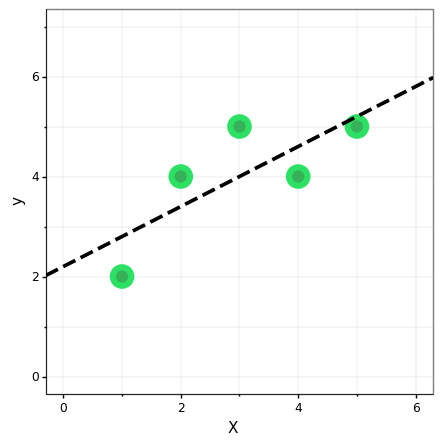

<ggplot: (-9223363304153709182)>

In [0]:
fig = fig + geom_abline(intercept = intercept, slope = w1, color="black", linetype="dashed", size=1.5)
fig

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Initialising all three regression models
lr = LinearRegression()

lambd = 1
##### YOUR CODE STARTS #####
# Ridge regression
lr_ridge = Ridge() # L2 regularisation + Linear Regression

# Lasso 
lr_lasso = Lasso() # L1 regularisation + Linear Regression
##### YOUR CODE ENDS ##### (please do not delete this line)

In [0]:
lr.fit(example_data[['x']], example_data[['y']])

##### YOUR CODE STARTS #####
lr_ridge.fit(example_data[['x']], example_data[['y']])
lr_lasso.fit(example_data[['x']], example_data[['y']])
##### YOUR CODE ENDS ##### (please do not delete this line)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

How to list all attributes of the object in Python? Let's remind ourselves names of attributes that store weights and intercept of the model.

In [0]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

Let's print our weights and intercepts for each model:

In [0]:
##### YOUR CODE STARTS #####
print(f'Sklearn Linear regression w1 is {lr.coef_} and intercept is {lr.intercept_}')
print(f'Sklearn Ridge regression w1 is {lr_ridge.coef_} and intercept is {lr_ridge.intercept_}')
print(f'Sklearn Lasso regression w1 is {lr_lasso.coef_} and intercept is {lr_lasso.intercept_}')
##### YOUR CODE ENDS ##### (please do not delete this line)

Sklearn Linear regression w1 is [[0.6]] and intercept is [2.2]
Sklearn Ridge regression w1 is [[0.54545455]] and intercept is [2.36363636]
Sklearn Lasso regression w1 is [0.1] and intercept is [3.7]


Now we can add **Ridge** and **LASSO** regression to our figure (no need to baseline linear regression, as it is the same as the manually calculated one):

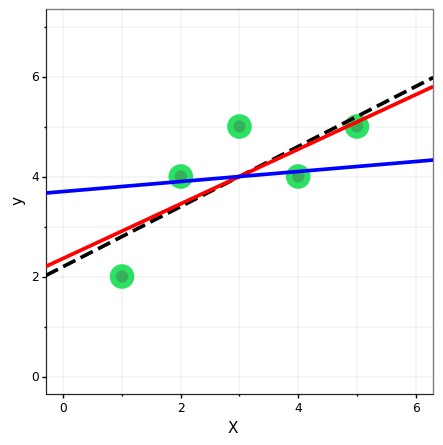

<ggplot: (-9223363304157910524)>

In [0]:
fig = fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1.5)
fig = fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1.5)
fig

This was way too easy. Let's add more features to our toy example by producing multiple polynomials form the original distance.

In [0]:
example_data['x^2'] = example_data.x**2
example_data['x^3']= example_data.x**3
example_data['x^4'] = example_data.x**4

In [0]:
example_data

,x,y,x^2,x^3,x^4
0,1,2,1,1,1
1,2,4,4,8,16
2,3,5,9,27,81
3,4,4,16,64,256
4,5,5,25,125,625


In [0]:
lr = LinearRegression()

# Regularization strength
lambd = 1

# Ridge regression (L2)
lr_ridge = Ridge(lambd)

# Lasso regression (L1)
lr_lasso = Lasso(lambd)

Here we should use new features to fit all three models:

In [0]:
##### YOUR CODE STARTS #####
lr.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_lasso.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
##### YOUR CODE ENDS ##### (please do not delete this line)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Printing out resulting coefficients, what can you notice?

In [0]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression, forces coefficients to be small: [{lr_ridge.coef_}, {round(lr_ridge.intercept_[0], 8)}]')
print(f'Lasso regression, acts as a feature selection: [{lr_lasso.coef_}, {round(lr_lasso.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression, forces coefficients to be small: [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Lasso regression, acts as a feature selection: [[ 0.          0.          0.05608653 -0.00829621], 3.1005046]


To visualise the resulting trends (these are not lines now, buy polynomial splines) we need a syntheticc test set.

In [0]:
test_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61),
                          'x^2': np.linspace(start=0, stop=6, num=61)**2,
                          'x^3': np.linspace(start=0, stop=6, num=61)**3,
                          'x^4': np.linspace(start=0, stop=6, num=61)**4})

test_data.head()

,x,x^2,x^3,x^4
0,0.0,0.00,0.000,0.0000
1,0.1,0.01,0.001,0.0001
2,0.2,0.04,0.008,0.0016
3,0.3,0.09,0.027,0.0081
4,0.4,0.16,0.064,0.0256


Use function `predict` to produce additional columns for each type of model

In [0]:
##### YOUR CODE STARTS #####
test_data['lr_y'] = lr.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_y'] = lr_ridge.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_lass_y'] = lr_lasso.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
##### YOUR CODE ENDS ##### (please do not delete this line)
test_data

,x,x^2,x^3,x^4,lr_y,lr_ridge_y,lr_lass_y
0,0.0,0.00,0.000,0.0000,5.000000,1.720502,3.100505
1,0.1,0.01,0.001,0.0001,4.200688,1.765307,3.100560
2,0.2,0.04,0.008,0.0016,3.544000,1.821272,3.100940
3,0.3,0.09,0.027,0.0081,3.017188,1.887222,3.101952
4,0.4,0.16,0.064,0.0256,2.608000,1.962028,3.103882
...,...,...,...,...,...,...,...
56,5.6,31.36,175.616,983.4496,10.096000,5.139591,4.791290
57,5.7,32.49,185.193,1055.6001,11.508688,5.229498,4.729854
58,5.8,33.64,195.112,1131.6496,13.120000,5.333070,4.655254
59,5.9,34.81,205.379,1211.7361,14.945188,5.451616,4.566680


We can now visualise these trends by colouring 

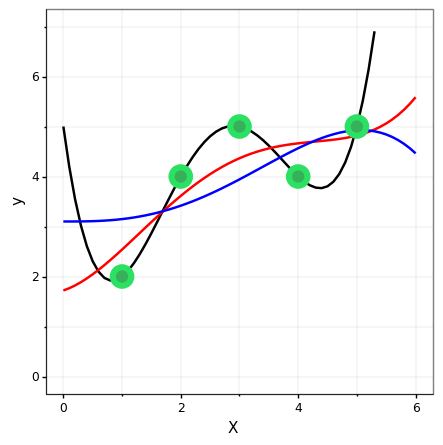

<ggplot: (-9223363304157904608)>

In [0]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

Here I was just playing around with `lambd` coeffiient for Ridge regression. Let's see where this led me:

In [0]:
# Ridge regression (L2)
lr_ridge_01 = Ridge(0.1)
lr_ridge_05 = Ridge(0.5)
lr_ridge_08 = Ridge(0.8)
lr_ridge_1 = Ridge(1)
lr_ridge_1000 = Ridge(1000)

# Train each one of these models on example_data
lr_ridge_01.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_05.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_08.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_1.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_1000.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Test each one of these models on test_data for visualisation purposes
test_data['lr_ridge_01_y'] = lr_ridge_01.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_05_y'] = lr_ridge_05.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_08_y'] = lr_ridge_08.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_1_y'] = lr_ridge_1.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_1000_y'] = lr_ridge_1000.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])

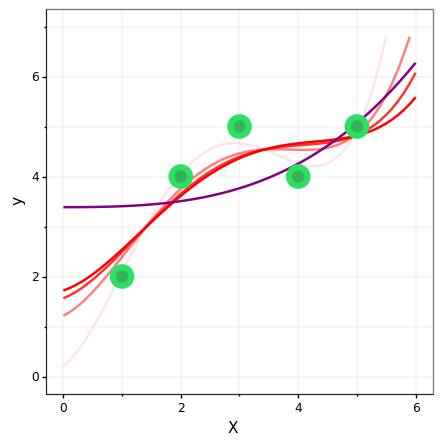

<ggplot: (8732696796343)>

In [0]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_01_y'), size = 1, colour = 'red', alpha = 0.1) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_05_y'), size = 1, colour = 'red', alpha = 0.5) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_08_y'), size = 1, colour = 'red', alpha = 0.8) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_1_y'), size = 1, colour = 'red', alpha = 1) +
       geom_path(data =   test_data, mapping = aes(x = 'x', y = 'lr_ridge_1000_y'), size = 1, colour = 'purple', alpha = 1) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

In [0]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression(0.1): [{lr_ridge_01.coef_}, {round(lr_ridge_01.intercept_[0], 8)}]')
print(f'Ridge regression(0.5), acts as a feature selection: [{lr_ridge_05.coef_}, {round(lr_ridge_05.intercept_[0], 8)}]')
print(f'Ridge regression(0.8), acts as a feature selection: [{lr_ridge_08.coef_}, {round(lr_ridge_08.intercept_[0], 8)}]')
print(f'Ridge regression(1.0), acts as a feature selection: [{lr_ridge_1.coef_}, {round(lr_ridge_1.intercept_[0], 8)}]')
print(f'Ridge regression(1000), acts as a feature selection: [{lr_ridge_1000.coef_}, {round(lr_ridge_1000.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression(0.1): [[[ 0.91918473  1.56762301 -0.67997714  0.07350262]], 0.20575024]
Ridge regression(0.5), acts as a feature selection: [[[ 0.57826166  0.91934053 -0.3591395   0.03625419]], 1.21517709]
Ridge regression(0.8), acts as a feature selection: [[[ 0.44679205  0.71038556 -0.25332825  0.02390007]], 1.56552074]
Ridge regression(1.0), acts as a feature selection: [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Ridge regression(1000), acts as a feature selection: [[[0.0019322  0.00594611 0.01132294 0.0001677 ]], 3.38642867]


Optimal value for `lambda` term should be found via cross-validation algorithm.

## Homework Exercise 1 (3 points): ElasticNet algorithm combines both Ridge and LASSO regression.
<font color='red'> In the class we discussed Ridge and Lasso regression algorithms, which are basically, L2 and L1 regularisation applied to Linear Regression model. ElasticNet is a method that combines both L2 and L1 regularisation under one model. ElasticNet adds both L2 and L1 norms to the error function. Here you should train and visualise ElasticNet model on the toy dataset. </font>

<font color='red'> **(a)** Train ElasticNet from `sklearn` on example data. Test it on our artificial test data. **(1 points)**. </font>


In [0]:
from sklearn.linear_model import ElasticNet

# Regularization strength
lambd = 1

##### YOUR CODE STARTS #####

# Initialise ElasticNet regression (L1/L2)
lr_elastic = ElasticNet()

# Fit ElasticNet to our example_data
lr_elastic.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Test it on test set (re-run test set generation if needed)
test_data['lr_elastic_y'] = lr_elastic.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])

##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'> **(b)** Visualise all four regression trends (baseline, LASSO, Ridge and ElasticNet) on the same figure. Highlight ElasticNet in <font color='#F1C40F'>yellow</font>. **(1 points)**. </font>


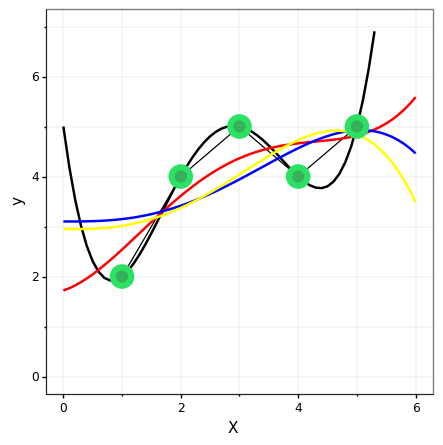

<ggplot: (-9223363304157998304)>

In [0]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       ##### YOUR CODE STARTS #####
       geom_path() +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_elastic_y'), size = 1, colour = 'yellow') +
       ##### YOUR CODE ENDS ##### (please do not delete this line)
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig


<font color='red'> **(c)** Print out ElasticNet coefficients, compare it to coefficients of other regressions, which one ElasticNet seems to be more similar to? Which parameter in `sklearn.ElasticNet` is responsible for the difference between Ridge and LASSO? **(1 points)**. </font>

In [0]:
##### YOUR CODE STARTS #####
print(f'Sklearn Linear regression w1 is {lr.coef_} and intercept is {lr.intercept_}')
print(f'Sklearn Ridge regression w1 is {lr_ridge.coef_} and intercept is {lr_ridge.intercept_}')
print(f'Sklearn Lasso regression w1 is {lr_lasso.coef_} and intercept is {lr_lasso.intercept_}')
print(f'Sklearn ElasticNet regression w1 is {lr_elastic.coef_} and intercept is {lr_elastic.intercept_}')

##### YOUR CODE ENDS ##### (please do not delete this line)

Sklearn Linear regression w1 is [[-8.75        7.79166667 -2.25        0.20833333]] and intercept is [5.]
Sklearn Ridge regression w1 is [[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]] and intercept is [1.72050238]
Sklearn Lasso regression w1 is [ 0.          0.          0.05608653 -0.00829621] and intercept is [3.1005046]
Sklearn ElasticNet regression w1 is [ 0.          0.          0.07844547 -0.01265445] and intercept is [2.9476951]


<font color='red'> Your textual answer goes here: </font>  
ElasticNet's coefficients are similar to Lasso's coefficients. The ratio of $L_1$ to $L_2$ regularization - `l1_ratio=0.5` is resposible for result's difference.

## Homework exercise 2 (4 points):

<font color='red'> Implement basic linear regression and Ridge regression using the closed form solutions (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution). Run your implementations on the following synthetic dataset. Compare model coefficients to coefficients produced by `sklearn` functions `LinearRegression` and `Ridge`. Speculate about the difference in coefficients that you observe. </font>

In [0]:
# here we generate a synthetic dataset:
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=4,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

<font color='red'> **(a)** Implement closed form solutions for both baseline linear regression and ridge regression (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution) on the synthetic dataset: **(3 points)**. </font>



In [0]:
n, m = X.shape
I = np.identity(m)
lambd = 1

##### YOUR CODE STARTS #####

X_in = np.insert(X, X.shape[1], values=1, axis=1)
n, m = X_in.shape
I = np.identity(m)

# Implement baseline linear regression (closed form solution)
*lr_coef, lr_intercept = np.linalg.inv(X_in.T @ X_in) @ (X_in.T @ y)

# Implement Ridge regression (closed form solution)
*lr_ridge_coef, lr_rigde_intercept = np.linalg.inv(X_in.T @ X_in + lambd * I) @ X_in.T @ y

##### YOUR CODE ENDS ##### (please do not delete this line)

In [0]:
lr_coef

[86.79339529504163,
 0.12444454574810587,
 0.6993630026774282,
 -1.7860152669539104]

In [0]:
# Initialise Linear Regression model from sklearn: 
lr = LinearRegression()
lr.fit(X, y)

# Initialise  Ridge regression (L2) model from sklearn:
lr_ridge = Ridge(lambd, solver='cholesky')
lr_ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

<font color='red'> **(b)** Compare coefficients you obtained using closed form solution and sklearn implementations. Comment on the difference you observe. **(1 point)**. </font>



In [0]:
##### YOUR CODE STARTS #####
print(lr_coef, lr_intercept)
print(lr.coef_, lr.intercept_)
print('-----')
print(lr_ridge_coef, lr_rigde_intercept)
print(lr_ridge.coef_, lr_ridge.intercept_)
##### YOUR CODE ENDS ##### (please do not delete this line)

[86.79339529504163, 0.12444454574810587, 0.6993630026774282, -1.7860152669539104] -0.2103184753120626
[86.7933953   0.12444455  0.699363   -1.78601527] -0.21031847531200132
-----
[84.5205120816384, -0.5923468175173963, 0.2259405642725466, -2.2291011106411602] 0.14585751989680706
[84.51986709 -0.59219469  0.22580939 -2.23109663] 0.14955471081851357


<font color='red'>Your textual answer explaining the difference between coefficients goes here:</font>
The coefficients are very similar, the small difference could be due accuracy of float point values.

# L2 and L1 regularization as weight decay in the Neural Networks

## Back to CIFAR10


In [0]:
# old school TF
%tensorflow_version 1.x

# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

TensorFlow 1.x selected.


Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [0]:
# Auxiliary function for plotting performance curves (loss and accuracy)
def plot_curves(history):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')

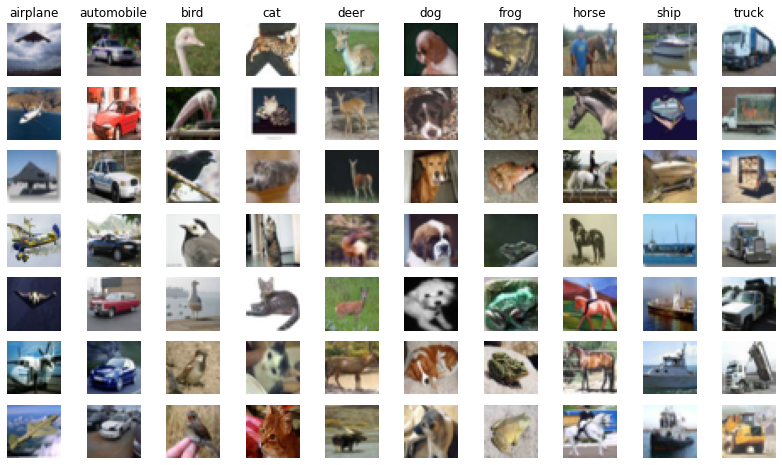

In [0]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
# "Names" of classes:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((32, 32, 3)), plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

What if we use L2 regularisation or in other words weight decay (don't confuse with learning rate decay, these are different things)

In [0]:
# old school TF
%tensorflow_version 1.x
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers
from keras import optimizers
from keras import Sequential

def define_model(lambd):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd), input_shape=(32, 32, 3)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return(model)

By setting `lambd` to 0 we effectively use no weight decay. Let's see what our network is capable of without L2 regularisation.

In [0]:
# lambd = 0 to indicate no regularisation
model = define_model(lambd = 0)

# we can use sparse categorical crossentropy since our classes are mutually exclusive
# also we don't need to turn labels into the categorical one-hot coded variable  
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
______________________________________

In [0]:
# As last time we fit the model
# fit function returns History object, which keeps record of all losses and accuracies that we can plot later
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 12s 586us/step - loss: 2.0294 - accuracy: 0.3925 - val_loss: 1.5856 - val_accuracy: 0.4676
Epoch 2/20
20000/20000 [==============================] - 5s 229us/step - loss: 1.3833 - accuracy: 0.5398 - val_loss: 1.1859 - val_accuracy: 0.5968
Epoch 3/20
20000/20000 [==============================] - 5s 230us/step - loss: 1.1402 - accuracy: 0.6138 - val_loss: 0.9415 - val_accuracy: 0.6734
Epoch 4/20
20000/20000 [==============================] - 5s 230us/step - loss: 0.9727 - accuracy: 0.6678 - val_loss: 0.8667 - val_accuracy: 0.7092
Epoch 5/20
20000/20000 [==============================] - 5s 230us/step - loss: 0.8781 - accuracy: 0.6970 - val_loss: 0.9840 - val_accuracy: 0.6706
Epoch 6/20
20000/20000 [==============================] - 4s 217us/step - loss: 0.8117 - accuracy: 0.7167 - val_loss: 0.7875 - val_accuracy: 0.7390
Epoch 7/20
20000/20000 [==============================] - 5s 

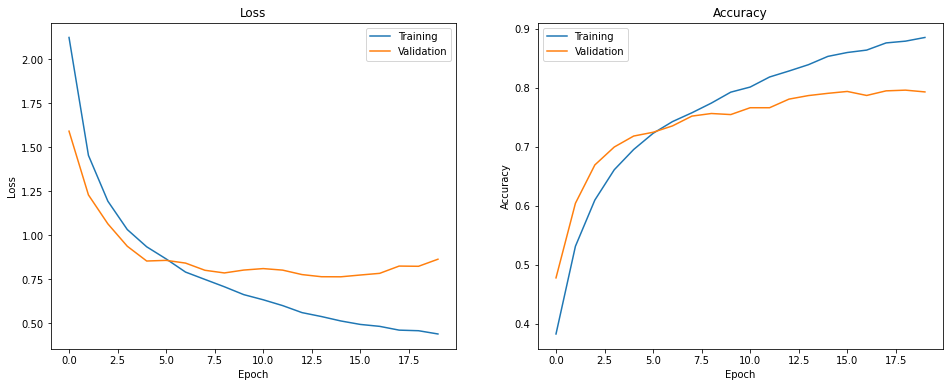

In [0]:
# plot the trajectories
plot_curves(history)

In [0]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 111us/step


[0.7260444674968719, 0.7860999703407288]

Now let's add some (0.0001) **L2** regularisation to our model

In [0]:
# Adding the L2 regularisation:
model = define_model(0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

Train again

In [0]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 241us/step - loss: 2.1225 - accuracy: 0.3823 - val_loss: 1.5910 - val_accuracy: 0.4774
Epoch 2/20
20000/20000 [==============================] - 4s 206us/step - loss: 1.4537 - accuracy: 0.5310 - val_loss: 1.2293 - val_accuracy: 0.6038
Epoch 3/20
20000/20000 [==============================] - 4s 204us/step - loss: 1.1938 - accuracy: 0.6093 - val_loss: 1.0652 - val_accuracy: 0.6688
Epoch 4/20
20000/20000 [==============================] - 4s 208us/step - loss: 1.0329 - accuracy: 0.6607 - val_loss: 0.9382 - val_accuracy: 0.6992
Epoch 5/20
20000/20000 [==============================] - 4s 204us/step - loss: 0.9350 - accuracy: 0.6950 - val_loss: 0.8543 - val_accuracy: 0.7178
Epoch 6/20
20000/20000 [==============================] - 4s 205us/step - loss: 0.8663 - accuracy: 0.7224 - val_loss: 0.8580 - val_accuracy: 0.7242
Epoch 7/20
20000/20000 [==============================] - 4s 20

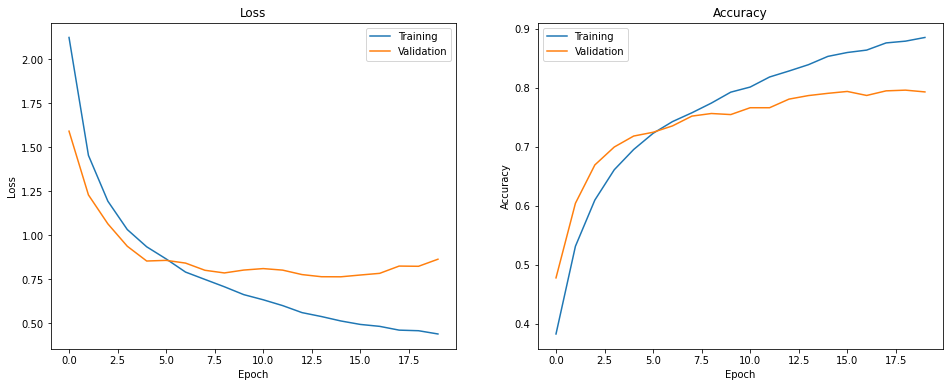

In [0]:
plot_curves(history)

In [0]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 149us/step


[1.0287399797439576, 0.6477000117301941]

## Homework exercise 3 (5 points): searching for lambda
<font color='red'> Adopt implementation of the cross-validation algorithm from the first practice session to find the best possible lambda for weight decay for the neural network we used in the class (that you call via `define_model`). </font>

<font color='red'> **(a)** Implement and run cross-validation by filling in the gaps. **(3 points)**. </font>


In [0]:
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1] # feel free to choose other values to loop over

# you can collect both accuracy and loss if you like, 
# but loss is influenced by the regularisation itself, so maybe less informative
val_fold_acc = np.zeros(len(lambdas))

for i,param in enumerate(lambdas):
  print(f'Validation loss for lambda = {param}...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeate functions
  folds_indx =  np.arange(X_train_norm.shape[0])

  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4 # feel free to change the number of folds, but make sure the rest of the code complies

  folds_indx = np.asarray(np.array_split(folds_indx, 4))

  # initialise variable that will hold RMSEs for each fold
  fold_acc = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):

    # split data into train_X, train_y and val_X, val_y depending on the fold:
    train_X = X_train_norm.take(np.concatenate(np.delete(folds_indx, fold_indx, axis=0)))
    train_y = y_train.take(np.concatenate(np.delete(folds_indx, fold_indx, axis=0)))
    val_X = X_train_norm.take(folds_indx[fold_indx])
    val_y = y_train.take(folds_indx[fold_indx])
    # train the neural network with lambda = param
    model = define_model(param)

    # compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

    # fit the neural network on training data
    # number of epochs is tricky, if you choose too little the performance will be unstable
    # if you choose too large, it will take ages to complete...
    model.fit(X_train_norm, y_train, batch_size=64, epochs=8)

    # calculate accuracy for this fold
    fold_acc[fold_indx] = model.evaluate(X_test_norm, y_test)[1]
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation accuracy for {param} is {np.mean(fold_acc)}')
  val_fold_acc[i] = np.mean(fold_acc)

Validation loss for lambda = 1e-06...
Epoch 1/8
25000/25000 [==============================] - 6s 250us/step - loss: 1.9405 - accuracy: 0.4058
Epoch 2/8
25000/25000 [==============================] - 5s 198us/step - loss: 1.2901 - accuracy: 0.5702
Epoch 3/8
25000/25000 [==============================] - 5s 200us/step - loss: 1.0503 - accuracy: 0.6434
Epoch 4/8
25000/25000 [==============================] - 5s 195us/step - loss: 0.9166 - accuracy: 0.6833
Epoch 5/8
25000/25000 [==============================] - 5s 198us/step - loss: 0.8300 - accuracy: 0.7122
Epoch 6/8
25000/25000 [==============================] - 5s 195us/step - loss: 0.7504 - accuracy: 0.7388
Epoch 7/8
25000/25000 [==============================] - 5s 196us/step - loss: 0.7035 - accuracy: 0.7553
Epoch 8/8
10000/10000 [==============================] - 2s 227us/step
Epoch 1/8
25000/25000 [==============================] - 6s 250us/step - loss: 1.9851 - accuracy: 0.3934
Epoch 2/8
25000/25000 [============================

<font color='red'> **(b)** Visualise train/validation accuracy/loss for different lambda values, report the best one. **(1 point)**. </font>


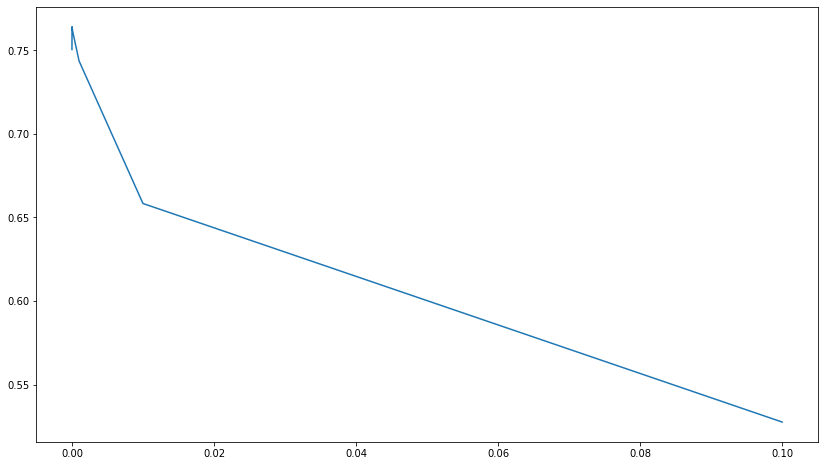

In [0]:
##### YOUR CODE STARTS #####
plt.plot(lambdas, val_fold_acc)
##### YOUR CODE ENDS ##### (please do not delete this line)
plt.show()

<font color='red'> **(c)** Re-train the network using the reported in the **(b)**, lambda value. Visualise performance curves and interpret the results. (if results did not improve, no need to re-run the process again, just comment on the results). **(1 point)**. </font>

In [0]:
##### YOUR CODE STARTS #####
# Define the model with found parameter lambda
model = define_model(0.00001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=8, validation_split=0.2)
##### YOUR CODE ENDS ##### (please do not delete this line)

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 10s 485us/step - loss: 2.0360 - accuracy: 0.3862 - val_loss: 1.5391 - val_accuracy: 0.4592
Epoch 2/8
20000/20000 [==============================] - 5s 264us/step - loss: 1.3894 - accuracy: 0.5398 - val_loss: 1.1828 - val_accuracy: 0.6030
Epoch 3/8
20000/20000 [==============================] - 5s 266us/step - loss: 1.1393 - accuracy: 0.6168 - val_loss: 0.9880 - val_accuracy: 0.6640
Epoch 4/8
20000/20000 [==============================] - 5s 264us/step - loss: 0.9906 - accuracy: 0.6671 - val_loss: 0.9117 - val_accuracy: 0.6916
Epoch 5/8
20000/20000 [==============================] - 5s 267us/step - loss: 0.8922 - accuracy: 0.6934 - val_loss: 0.8194 - val_accuracy: 0.7208
Epoch 6/8
20000/20000 [==============================] - 5s 264us/step - loss: 0.8158 - accuracy: 0.7179 - val_loss: 0.7841 - val_accuracy: 0.7354
Epoch 7/8
20000/20000 [==============================] - 5s 267us/st

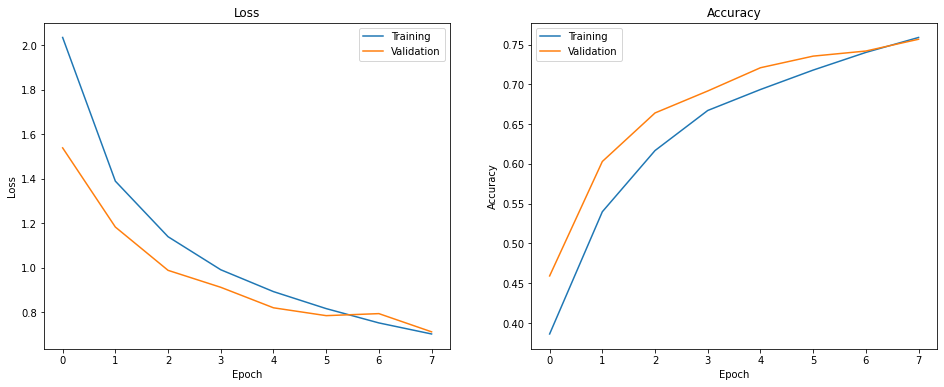

In [0]:
##### YOUR CODE STARTS #####
plot_curves(history)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [0]:
##### YOUR CODE STARTS #####
model.evaluate(X_test_norm, y_test)
##### YOUR CODE ENDS ##### (please do not delete this line)

10000/10000 [==============================] - 2s 211us/step


[0.7281893337249756, 0.7552000284194946]

<font color='red'> Your insightful interpretation of the results goes here: </font>
As we see from cross validation experiment the optimal value for $\lambda$ is $0.00001$. I I have chosen the number of epochs equals to 8 due based on previous experiments, the greater number of epochs ends up with overfitting.

## Augmentation

As we discussed in the lecture, augmentation is one of the most simple, yet effective ways to improve generalisation of many machine learning models. Unfortunately, not all types of data can be easily augmented (e.g. tabular data, or some sounds). Here we look at image augmentation techniques using Keras builtin `ImageDataGenerator` class (https://keras.io/preprocessing/image/).

In [0]:
%tensorflow_version 1.x

from keras.preprocessing.image import ImageDataGenerator

Let's load our CIFAR10 again.

In [0]:
# old school TF

# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


`ImageDataGenerator` is a framework that is used to apply a sereis of transformations (also knowns as augmentations) to the input images. Here is an example of simple augmentation pipeline using `ImageDataGenerator`:

In [0]:
datagen = ImageDataGenerator(rotation_range=90, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True) # horizontaly flip random 30% of images 

# assign augmentation pipeline to our data
datagen.fit(X_train)

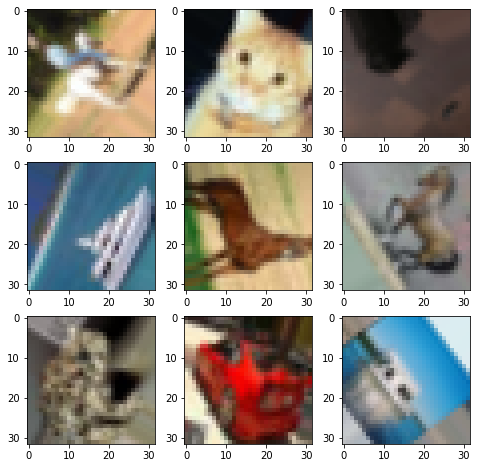

In [0]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8').reshape(32, 32, 3))
    # show the plot
    plt.show()
    break

Data generators in Keras do not have `validation_split` option for training. Why?
Here we create a separate validation set:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 111, test_size = 0.10)

print(X_train.shape)
print(X_val.shape)

(22500, 32, 32, 3)
(2500, 32, 32, 3)


In [0]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_val_norm = (X_val - mu)/std
X_test_norm = (X_test - mu)/std

Let's use the same simple augmentation schema as we defined before, but instead of 0 to 90 degrees, limit random rotation range to 15 degrees: 

In [0]:
##### YOUR CODE STARTS #####

#data augmentation
datagen = ImageDataGenerator(rotation_range=15, # randomly rotate an image from 0 to 15 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True)

# assign augmentation schema to X_train_norm
datagen.fit(X_train_norm)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [0]:
# Create a model 
model = define_model(0.00001)

# Compile the model as before (code is identical)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# instead of using .fit() we use .fit_generator() 
# .fit_generator trains the model on a batch by batch basis
# each batch is created by datagen.flow function that we saw before
history = model.fit_generator(datagen.flow(X_train_norm, y_train, batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )


Epoch 1/25
351/351 [==============================] - 18s 51ms/step - loss: 2.1487 - accuracy: 0.3439 - val_loss: 1.5315 - val_accuracy: 0.4856
Epoch 2/25
351/351 [==============================] - 13s 38ms/step - loss: 1.5827 - accuracy: 0.4732 - val_loss: 1.3709 - val_accuracy: 0.5352
Epoch 3/25
351/351 [==============================] - 13s 36ms/step - loss: 1.3609 - accuracy: 0.5374 - val_loss: 1.2058 - val_accuracy: 0.5968
Epoch 4/25
351/351 [==============================] - 12s 36ms/step - loss: 1.1842 - accuracy: 0.5927 - val_loss: 1.1703 - val_accuracy: 0.6156
Epoch 5/25
351/351 [==============================] - 12s 35ms/step - loss: 1.0973 - accuracy: 0.6252 - val_loss: 1.1284 - val_accuracy: 0.6332
Epoch 6/25
351/351 [==============================] - 13s 36ms/step - loss: 1.0185 - accuracy: 0.6474 - val_loss: 0.9370 - val_accuracy: 0.6760
Epoch 7/25
351/351 [==============================] - 12s 35ms/step - loss: 0.9563 - accuracy: 0.6692 - val_loss: 0.9706 - val_accuracy:

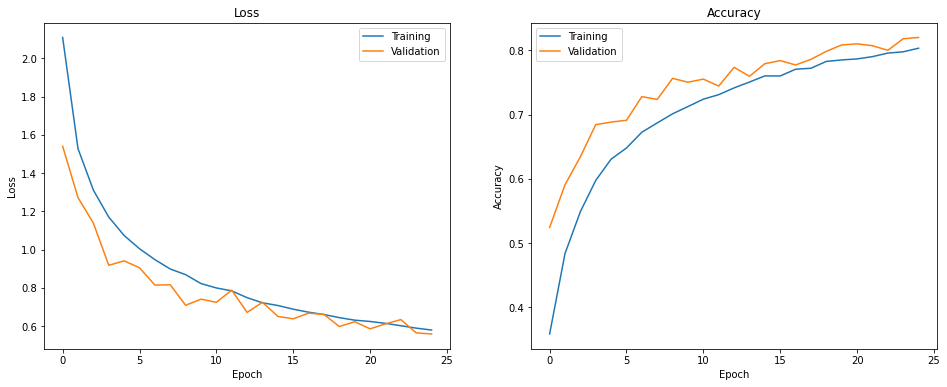

In [0]:
plot_curves(history)

In [0]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 2s 217us/step


[0.6373036894798279, 0.801800012588501]

## Homework exercise 4 (3 points): applying more sophisticated augmentation pipelines
<font color='red'> Check https://keras.io/preprocessing/image/ and add more interesting transformation into the above pipeline. Train your network again, and interpret the results. </font>

<font color='red'> **(a)** Add at least 2-3 more different transformations described at https://keras.io/preprocessing/image/. Visualise these augmentations on CIFAR10 images (as we have done for the simple pipeline). Briefly explain your choise (why these augmentation you added will help). **(1 point)**. </font>


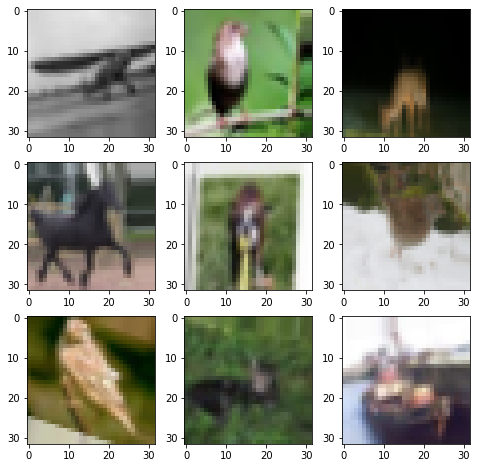

In [0]:
datagen = ImageDataGenerator(rotation_range=15,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 horizontal_flip=True,
                 shear_range=10,
                 zoom_range=0.1
                 )

datagen.fit(X_train_norm)

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8').reshape(32, 32, 3))
    # show the plot
    plt.show()
    break

<font color='red'> **(b)** Retrain the model using this new augmented training set, test this new model on the non-augmented test set data. **(1 point)**. </font>

In [0]:
model = define_model(0.00001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])


history = model.fit_generator(datagen.flow(X_train_norm, y_train, batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )

Epoch 1/25
351/351 [==============================] - 20s 57ms/step - loss: 2.1646 - accuracy: 0.3472 - val_loss: 1.3932 - val_accuracy: 0.5204
Epoch 2/25
351/351 [==============================] - 15s 42ms/step - loss: 1.5800 - accuracy: 0.4697 - val_loss: 1.8426 - val_accuracy: 0.4856
Epoch 3/25
351/351 [==============================] - 15s 42ms/step - loss: 1.3492 - accuracy: 0.5377 - val_loss: 1.2050 - val_accuracy: 0.5940
Epoch 4/25
351/351 [==============================] - 14s 41ms/step - loss: 1.2058 - accuracy: 0.5823 - val_loss: 1.1566 - val_accuracy: 0.6276
Epoch 5/25
351/351 [==============================] - 14s 41ms/step - loss: 1.1176 - accuracy: 0.6095 - val_loss: 1.0077 - val_accuracy: 0.6704
Epoch 6/25
351/351 [==============================] - 15s 42ms/step - loss: 1.0479 - accuracy: 0.6397 - val_loss: 0.9865 - val_accuracy: 0.6756
Epoch 7/25
351/351 [==============================] - 15s 41ms/step - loss: 0.9871 - accuracy: 0.6551 - val_loss: 0.9179 - val_accuracy:


<font color='red'> **(c)** Plot the performance curves (loss and accuracy) and interpret the results. Did the performance improve? Why? Why not? **(1 point)**. </font>

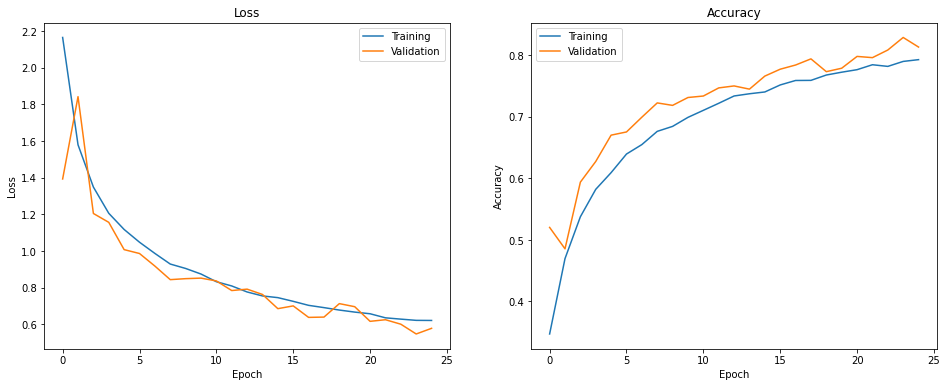

In [0]:
plot_curves(history)

# Bonus exercises
*(NB, these are optional exercises!)*
 

## Bonus exercise 1 (up to 3 bonus points depending on presentation):

<font color='red'> Use last module's code for training a shallow Neural Network (below) and add weight decay (L2 regularisation) term into both feed-forward and backpropagation parts. Train the network on the same synthetic spiral dataset (as last time) and check if adding regularisation helps to obtain better score. Visualise the resulting classifier. (Feel free to reuse as much code from previous practice session as possible) </font>

Spiral dataset generation:

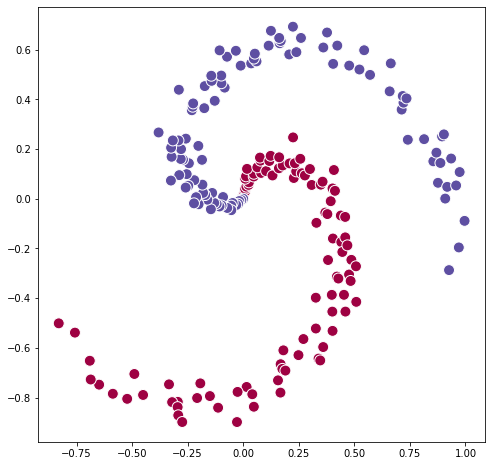

In [0]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes (purple and red circles)
X = np.zeros((N*K,D)) # data matrix (each row = single example)
num_examples = X.shape[0]
y = np.zeros(N*K, dtype='uint8') # class labels

# Adding some geometry
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.show()

In [0]:
truth = np.zeros((N*K, 2), dtype='uint8')
truth[y == 0] = [1, 0]
truth[y == 1] = [0, 1]

In [0]:
def plot_neural_network(X, y, W,b ,W2, b2):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Neural Network training code:

In [0]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0

# gradient descent loop
num_examples = X.shape[0]
for i in range(2000):
  # evaluate answers, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  answers = np.dot(hidden_layer, W2) + b2
  
  # compute the error: average sum of squared differences
  total_error = 1/2 * np.sum((truth - answers)**2)
  total_error = total_error/num_examples

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on answers
  dTEdA = answers - truth
  dTEdA /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dTEdA)
  db2 = np.sum(dTEdA, axis=0, keepdims=True)
  
  # next backprop into hidden layer
  dAdH = W2.T
  dH = np.dot(dTEdA, dAdH)
  
  # backprop the ReLU non-linearity
  dH[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dH)
  db = np.sum(dH, axis=0, keepdims=True)
  
  # perform a parameter update
  W -= step_size * dW
  b -= step_size * db
  W2 -= step_size * dW2
  b2 -= step_size * db2

iteration 0: loss 4.995891e-01
iteration 100: loss 1.406624e-01
iteration 200: loss 8.461980e-02
iteration 300: loss 6.781733e-02
iteration 400: loss 7.350600e-02
iteration 500: loss 7.976161e-02
iteration 600: loss 8.222437e-02
iteration 700: loss 8.387710e-02
iteration 800: loss 8.350567e-02
iteration 900: loss 8.410884e-02
iteration 1000: loss 8.313829e-02
iteration 1100: loss 8.291921e-02
iteration 1200: loss 8.326225e-02
iteration 1300: loss 8.260402e-02
iteration 1400: loss 8.600094e-02
iteration 1500: loss 8.427561e-02
iteration 1600: loss 8.242671e-02
iteration 1700: loss 8.165168e-02
iteration 1800: loss 8.120052e-02
iteration 1900: loss 8.095043e-02


In [0]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
answers = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(answers, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.94


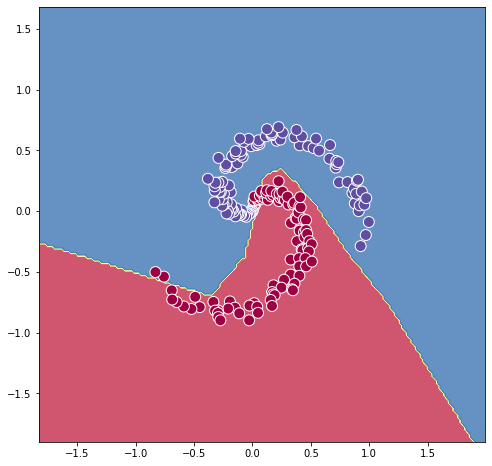

In [0]:
# plot the resulting classifier
plot_neural_network(X, y, W, b, W2, b2)

### With regularization

In [262]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
reg = 0.1

# some hyperparameters
step_size = 1e-0

# gradient descent loop
num_examples = X.shape[0]
for i in range(2000):
  # evaluate answers, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  answers = np.dot(hidden_layer, W2) + b2
  
  # compute the error: average sum of squared differences
  L2 = (np.sum(np.square(W)) + np.sum(np.square(W2)))*(reg/(2*num_examples))
  error = 1/num_examples * np.sum((truth - answers)**2)
  total_error = L2 + error

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on answers
  dTEdA = answers - truth
  dTEdA /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dTEdA) + reg/num_examples * np.abs(W2)
  db2 = np.sum(dTEdA, axis=0, keepdims=True)
  
  # next backprop into hidden layer
  dAdH = W2.T
  dH = np.dot(dTEdA, dAdH)
  
  # backprop the ReLU non-linearity
  dH[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dH) + reg/num_examples * np.abs(W)
  db = np.sum(dH, axis=0, keepdims=True)
  
  # perform a parameter update
  W -= step_size * dW
  b -= step_size * db
  W2 -= step_size * dW2
  b2 -= step_size * db2

iteration 0: loss 9.997195e-01
iteration 100: loss 2.801957e-01
iteration 200: loss 1.719998e-01
iteration 300: loss 1.403148e-01
iteration 400: loss 1.537585e-01
iteration 500: loss 1.680205e-01
iteration 600: loss 1.753034e-01
iteration 700: loss 1.781121e-01
iteration 800: loss 1.838025e-01
iteration 900: loss 1.830199e-01
iteration 1000: loss 1.835598e-01
iteration 1100: loss 1.805423e-01
iteration 1200: loss 1.802046e-01
iteration 1300: loss 1.794369e-01
iteration 1400: loss 1.803251e-01
iteration 1500: loss 1.807652e-01
iteration 1600: loss 1.809860e-01
iteration 1700: loss 1.814971e-01
iteration 1800: loss 1.831280e-01
iteration 1900: loss 1.836471e-01


In [263]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
answers = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(answers, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.93


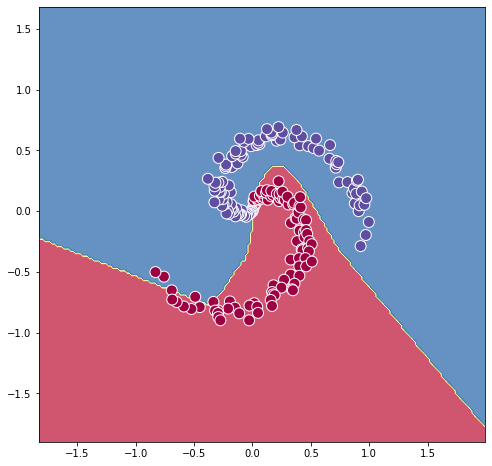

In [264]:
# plot the resulting classifier
plot_neural_network(X, y, W, b, W2, b2)

## Bonus exercise 2 (up to 4 bonus points depending on presentation):

<font color='red'> Do ANYTHING (still morally acceptible) to obtain as high accuracy on CIFAR10 test set as possible. Can you get up to 90%? Describe your approach in details, including code (document your approach below). Aim at making your code readable, as well as approach elegant and concise. If you use someone else's code (no problem, but) refence it properly. </font>

In [7]:
# FROM https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py
##### YOUR CODE STARTS #####
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np

# Training parameters
batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 10

n = 3

depth = n * 6 + 2

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
input_shape = x_train.shape[1:]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_v2(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]


print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
# set input mean to 0 over the dataset
featurewise_center=False,
# set each sample mean to 0
samplewise_center=False,
# divide inputs by std of dataset
featurewise_std_normalization=False,
# divide each input by its std
samplewise_std_normalization=False,
# apply ZCA whitening
zca_whitening=False,
# epsilon for ZCA whitening
zca_epsilon=1e-06,
# randomly rotate images in the range (deg 0 to 180)
rotation_range=0,
# randomly shift images horizontally
width_shift_range=0.1,
# randomly shift images vertically
height_shift_range=0.1,
# set range for random shear
shear_range=0.,
# set range for random zoom
zoom_range=0.,
# set range for random channel shifts
channel_shift_range=0.,
# set mode for filling points outside the input boundaries
fill_mode='nearest',
# value used for fill_mode = "constant"
cval=0.,
# randomly flip images
horizontal_flip=True,
# randomly flip images
vertical_flip=False,
# set rescaling factor (applied before any other transformation)
rescale=None,
# set function that will be applied on each input
preprocessing_function=None,
# image data format, either "channels_first" or "channels_last"
data_format=None,
# fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)


datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=1, workers=4,
                    callbacks=callbacks)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

##### YOUR CODE ENDS ##### (please do not delete this line)

Learning rate:  0.001
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_104 (BatchN (None, 32, 32, 16)   64          conv2d_116[0][0]                 
__________________________________________________________________________________________________
activation_104 (Activation)     (None, 32, 32, 16)   0           batch_normalization_104[0][0]    
______________________________________________________________________

## Bonus exercise 3 (up to 4 bonus points depending on presentation):
<font color='red'> Experimentally verify if CutMix augmentation helps to improve the test score on CIFAR10 (not clear, as images are very tiny). Link to the CutMix paper: https://arxiv.org/abs/1905.04899. Show couple of examples of CutMix augmented images and your implementation along with performance curves and scores. </font>


In [265]:
!pip install cutmix-keras

In [0]:
from cutmix_keras import CutMixImageDataGenerator  # Import CutMix

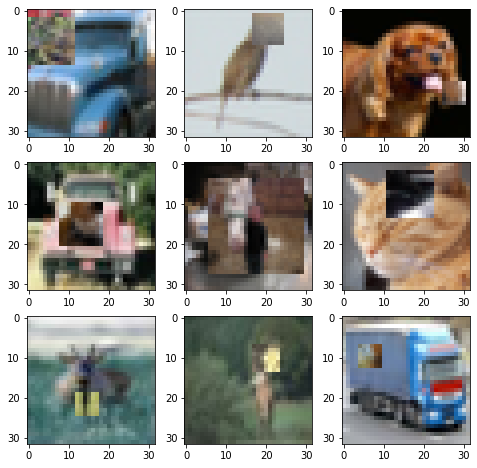

In [293]:
##### YOUR CODE STARTS #####
datagen1 = ImageDataGenerator()
datagen1.fit(X_train_norm)
train_generator1 = datagen1.flow(X_train, y_train, batch_size=64)
train_generator1.samples = train_generator1.n
train_generator1.class_indices = {}

datagen2 = ImageDataGenerator()
datagen2.fit(X_train_norm)
train_generator2 = datagen2.flow(X_train, y_train, batch_size=64)

train_generator = CutMixImageDataGenerator(
    generator1=train_generator1,
    generator2=train_generator2,
    img_size=32,
    batch_size=64,
)

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in  train_generator:
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8').reshape(32, 32, 3))
    # show the plot
    plt.show()
    break
##### YOUR CODE ENDS ##### (please do not delete this line)

In [294]:
train_generator.reset()
model = define_model(0.00001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])


history = model.fit_generator(train_generator,
                    steps_per_epoch=X_train_norm.shape[0]//64,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )

Epoch 1/25
351/351 [==============================] - 13s 37ms/step - loss: 2.7490 - accuracy: 0.0190 - val_loss: 4.1453 - val_accuracy: 0.1032
Epoch 2/25
351/351 [==============================] - 7s 20ms/step - loss: 2.2806 - accuracy: 0.0221 - val_loss: 6.3949 - val_accuracy: 0.1020
Epoch 3/25
351/351 [==============================] - 7s 20ms/step - loss: 2.1220 - accuracy: 0.0229 - val_loss: 2.5155 - val_accuracy: 0.1196
Epoch 4/25
351/351 [==============================] - 7s 20ms/step - loss: 2.0521 - accuracy: 0.0252 - val_loss: 6.1224 - val_accuracy: 0.1036
Epoch 5/25
351/351 [==============================] - 7s 20ms/step - loss: 1.9872 - accuracy: 0.0297 - val_loss: 4.7949 - val_accuracy: 0.0892
Epoch 6/25
351/351 [==============================] - 7s 21ms/step - loss: 1.9400 - accuracy: 0.0280 - val_loss: 3.9974 - val_accuracy: 0.1416
Epoch 7/25
351/351 [==============================] - 7s 21ms/step - loss: 1.8961 - accuracy: 0.0308 - val_loss: 3.3288 - val_accuracy: 0.105

Looks like CutMix doesn't work for dataset with small images.

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us